# Time Series Decomposition

In [1]:
library(fpp3)
options(repr.plot.width=12, repr.plot.height=6)

── Attaching packages ──────────────────────────────────────────── fpp3 0.4.0 ──

✔ tibble      3.1.6     ✔ tsibble     1.1.1
✔ dplyr       1.0.7     ✔ tsibbledata 0.4.0
✔ tidyr       1.1.4     ✔ feasts      0.2.2
✔ lubridate   1.8.0     ✔ fable       0.3.1
✔ ggplot2     3.3.5     

── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble::setdiff()   masks base::setdiff()
✖ tsibble::union()     masks base::union()



## Transformations and Adjustments

### Population Adjustments

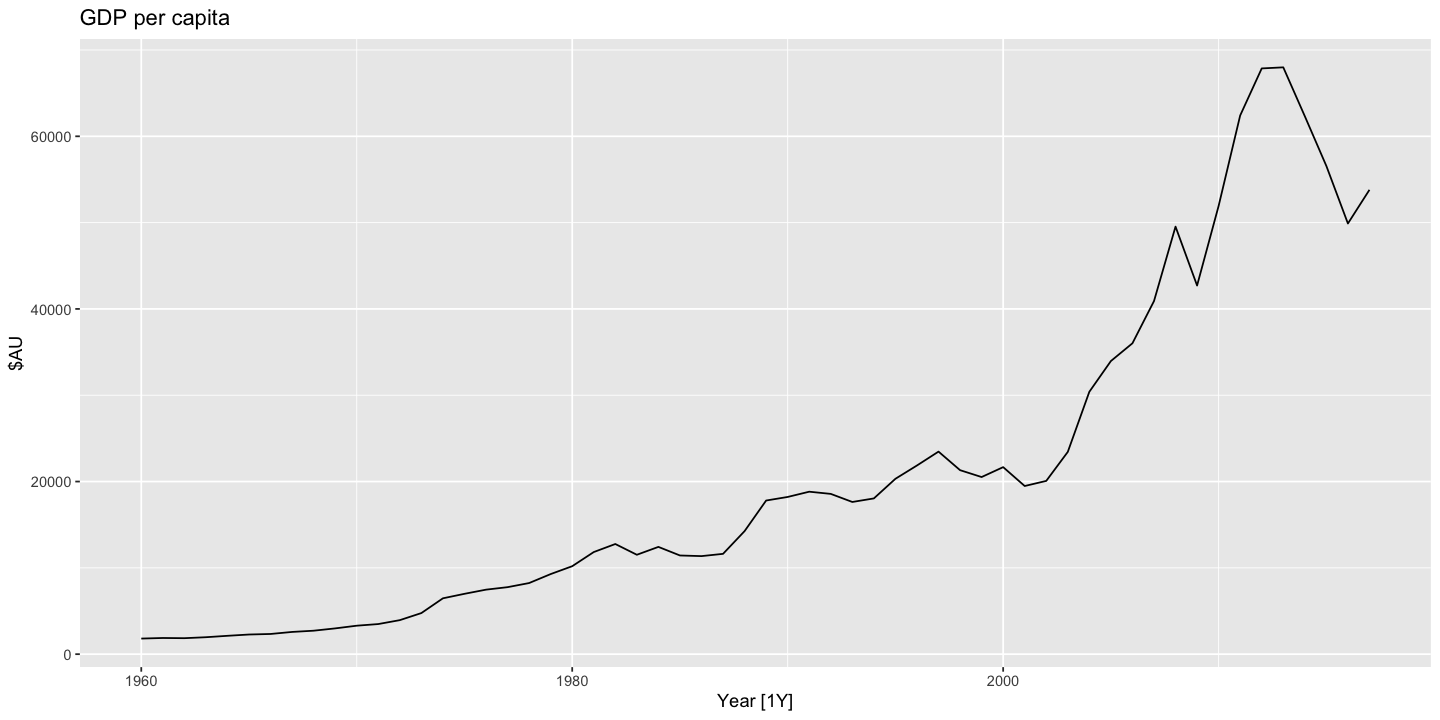

In [2]:
global_economy %>%
  filter(Country=="Australia") %>%
  autoplot(GDP/Population) +
  labs(title="GDP per capita", y="$AU")

### Inflation Adjustments

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


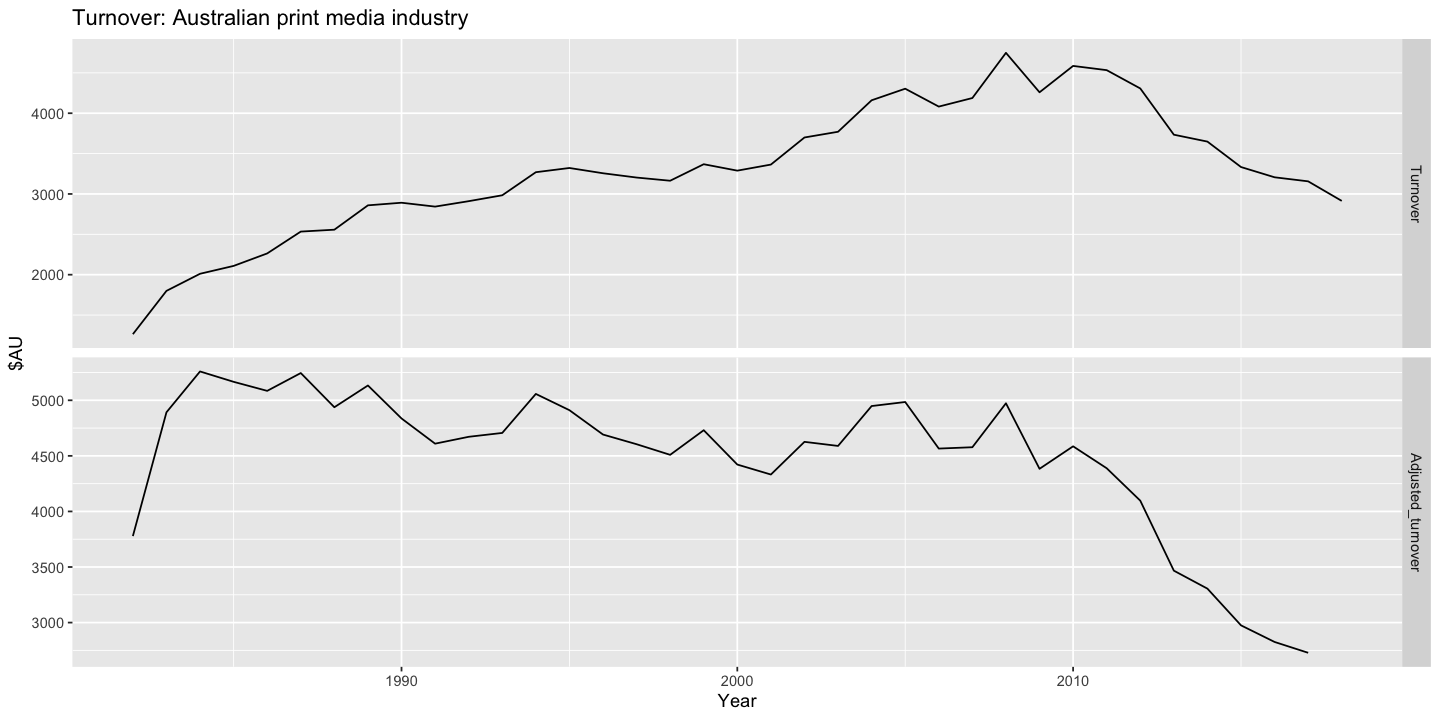

In [3]:
print_retail <- aus_retail %>%
  filter(Industry=="Newspaper and book retailing") %>%
  group_by(Industry) %>%
  index_by(Year=year(Month)) %>%
  summarise(Turnover=sum(Turnover))

aus_economy <- global_economy %>%
  filter(Code=="AUS")

print_retail %>%
  left_join(aus_economy, by="Year") %>%
  mutate(Adjusted_turnover=Turnover/CPI*100) %>%
  pivot_longer(c(Turnover, Adjusted_turnover),
               values_to="Turnover") %>%
  mutate(name=factor(name,
         levels=c("Turnover", "Adjusted_turnover"))) %>%
  ggplot(aes(x=Year, y=Turnover)) +
  geom_line() +
  facet_grid(name ~ ., scales="free_y") + 
  labs(title="Turnover: Australian print media industry", y="$AU")

### Mathematical Transformations

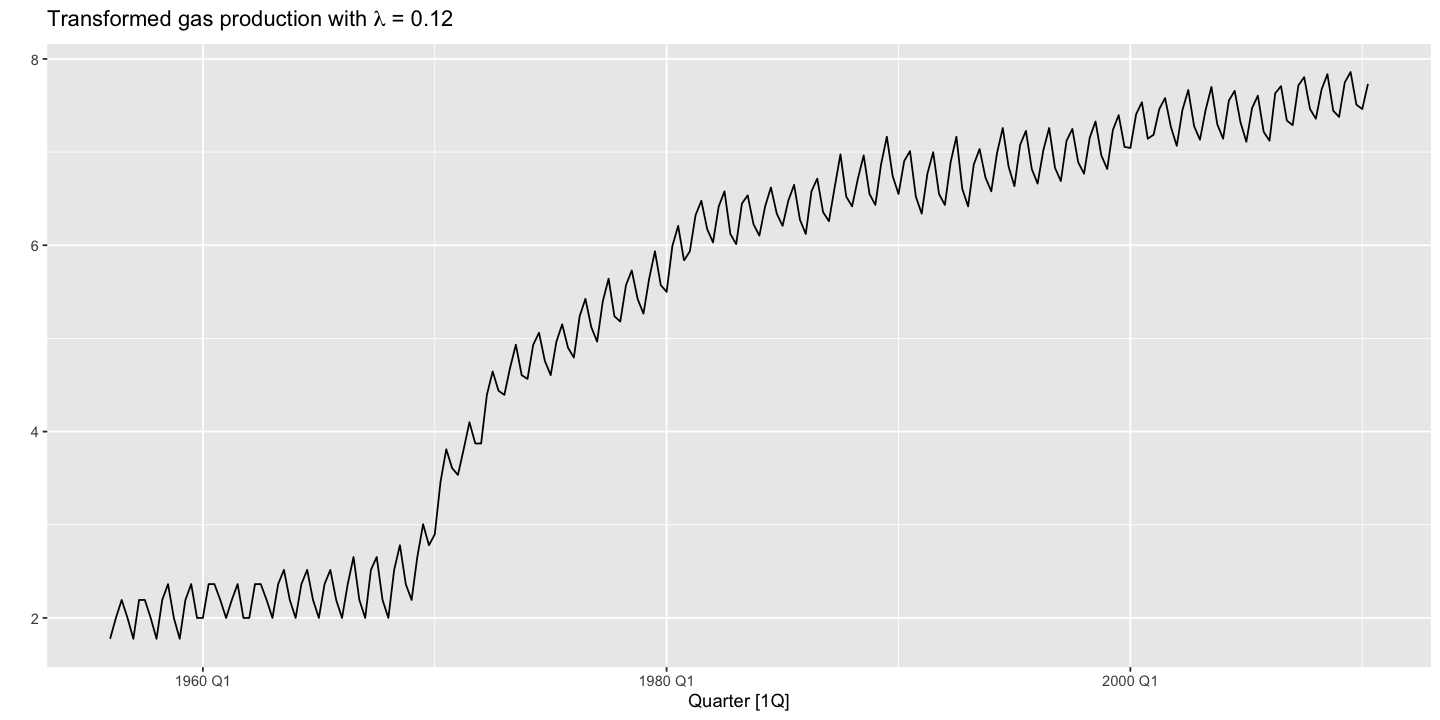

In [4]:
lambda <- aus_production %>%
  features(Gas, features=guerrero) %>%
  pull(lambda_guerrero)
aus_production %>%
  autoplot(box_cox(Gas, lambda)) +
  labs(y="",
       title=latex2exp::TeX(paste0(
       "Transformed gas production with $\\lambda$ = ", round(lambda, 2))))

## Time Series Components

### Example: Employment in the US Retail Sector

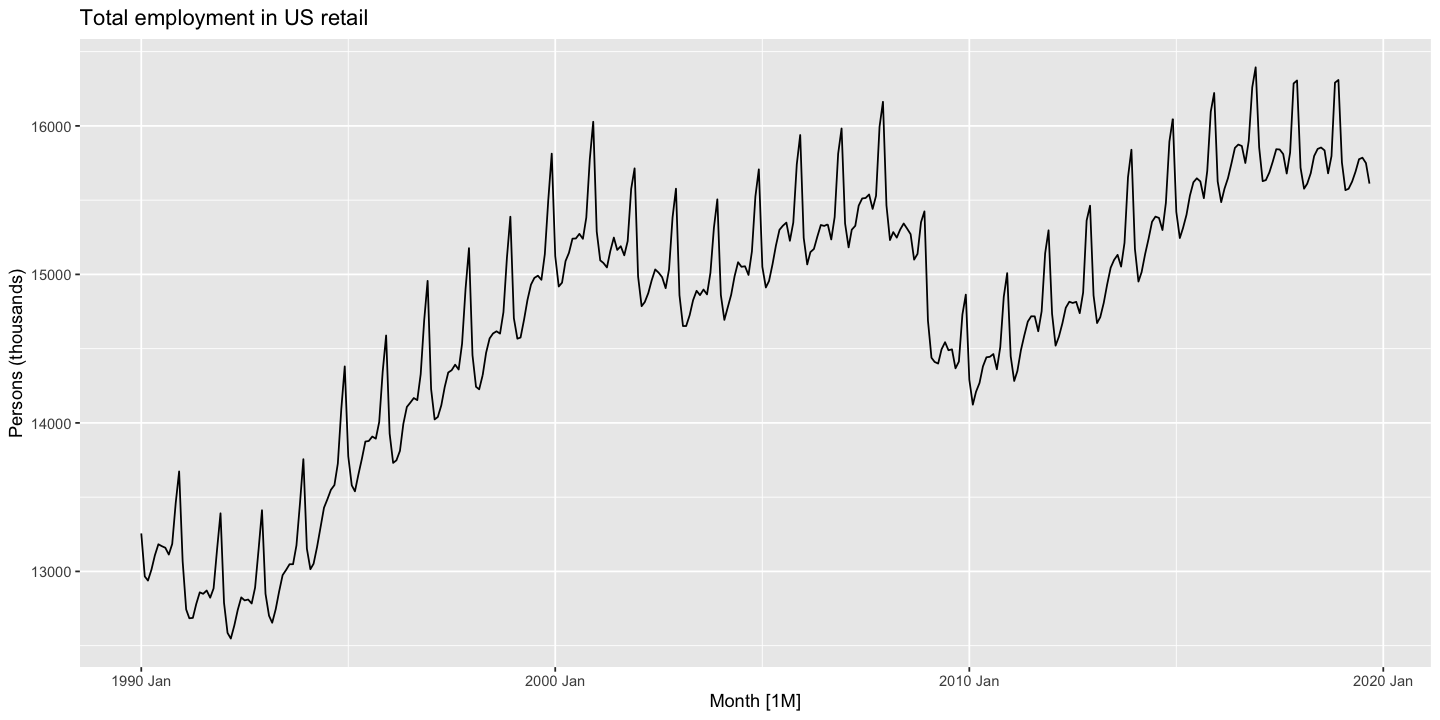

In [6]:
us_retail_employment <- us_employment %>%
  filter(year(Month)>=1990, Title=="Retail Trade") %>%
  select(-Series_ID)
autoplot(us_retail_employment, Employed) +
  labs(y="Persons (thousands)",
       title="Total employment in US retail")

In [7]:
dcmp <- us_retail_employment %>%
  model(stl=STL(Employed))
components(dcmp)

.model,Month,Employed,trend,season_year,remainder,season_adjust
<chr>,<mth>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
stl,1990 Jan,13255.8,13288.01,-33.047062,0.8358973,13288.85
stl,1990 Feb,12966.3,13269.10,-258.190424,-44.6052068,13224.49
stl,1990 Mar,12938.2,13250.18,-289.872766,-22.1073302,13228.07
stl,1990 Apr,13012.3,13231.26,-220.017519,1.0529563,13232.32
stl,1990 May,13108.3,13211.41,-114.395590,11.2815978,13222.70
stl,1990 Jun,13182.8,13191.56,-24.266100,15.5026778,13207.07
stl,1990 Jul,13170.1,13171.71,-23.239664,21.6268123,13193.34
stl,1990 Aug,13159.5,13151.27,-9.523898,17.7545764,13169.02
stl,1990 Sep,13113.4,13130.83,-39.450851,22.0250586,13152.85


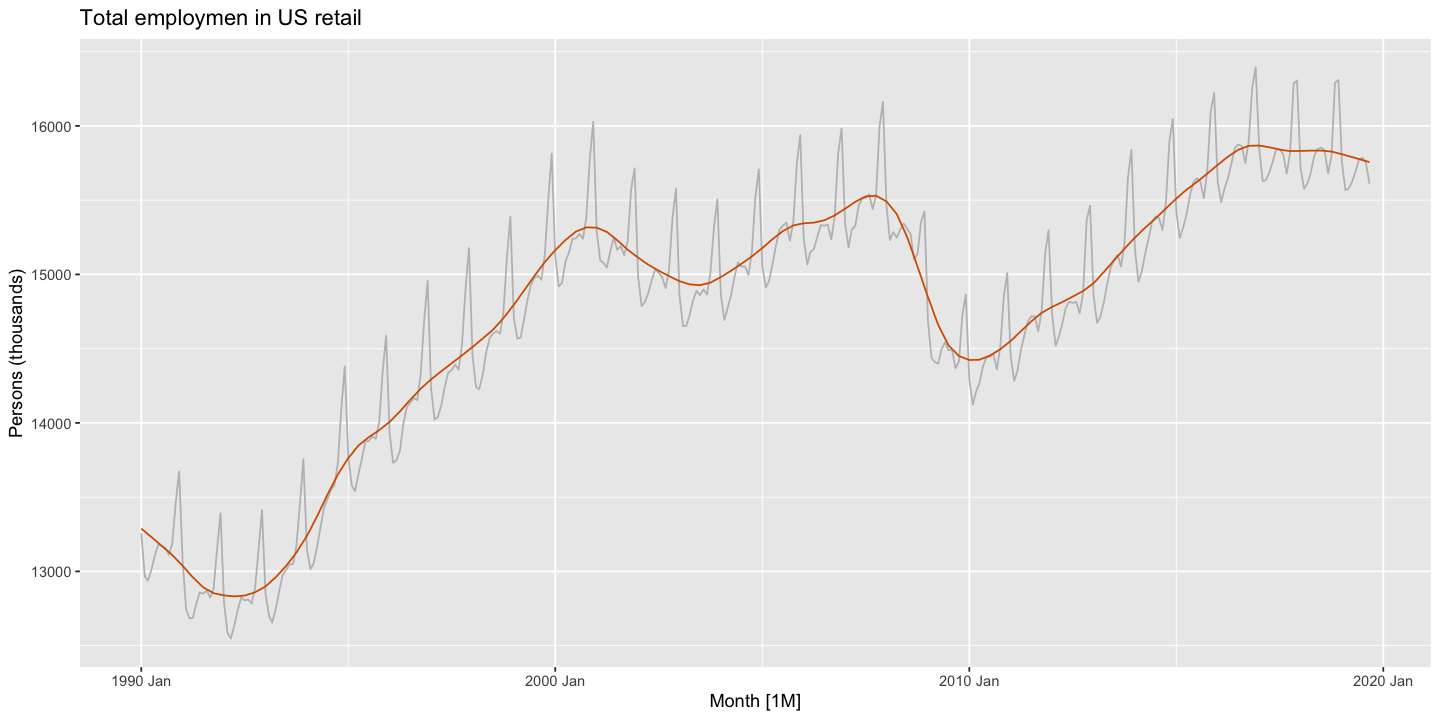

In [10]:
components(dcmp) %>%
  as_tsibble %>%
  autoplot(Employed, colour="gray") +
  geom_line(aes(y=trend), colour="#D55E00") +
  labs(
    y="Persons (thousands)",
    title="Total employmen in US retail")

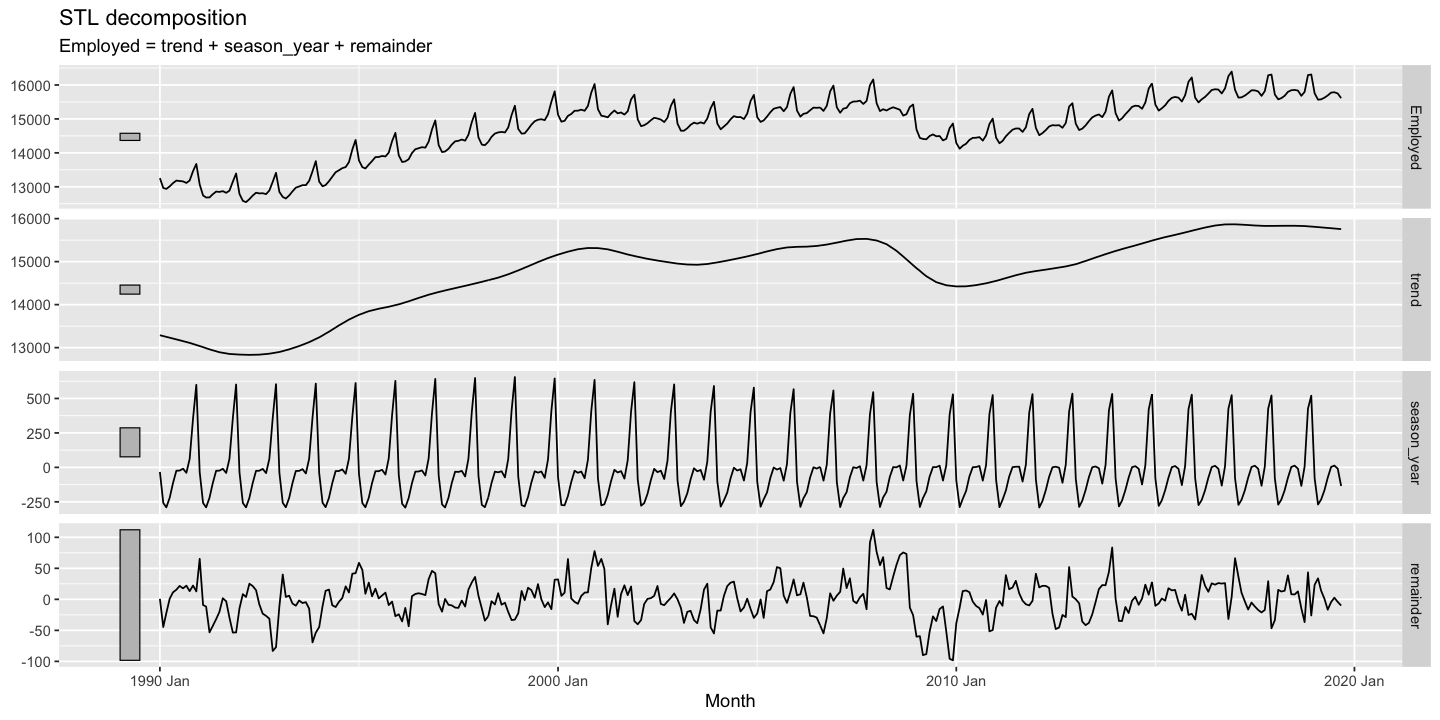

In [11]:
components(dcmp) %>% autoplot()

### Seasonally Adjusted Data

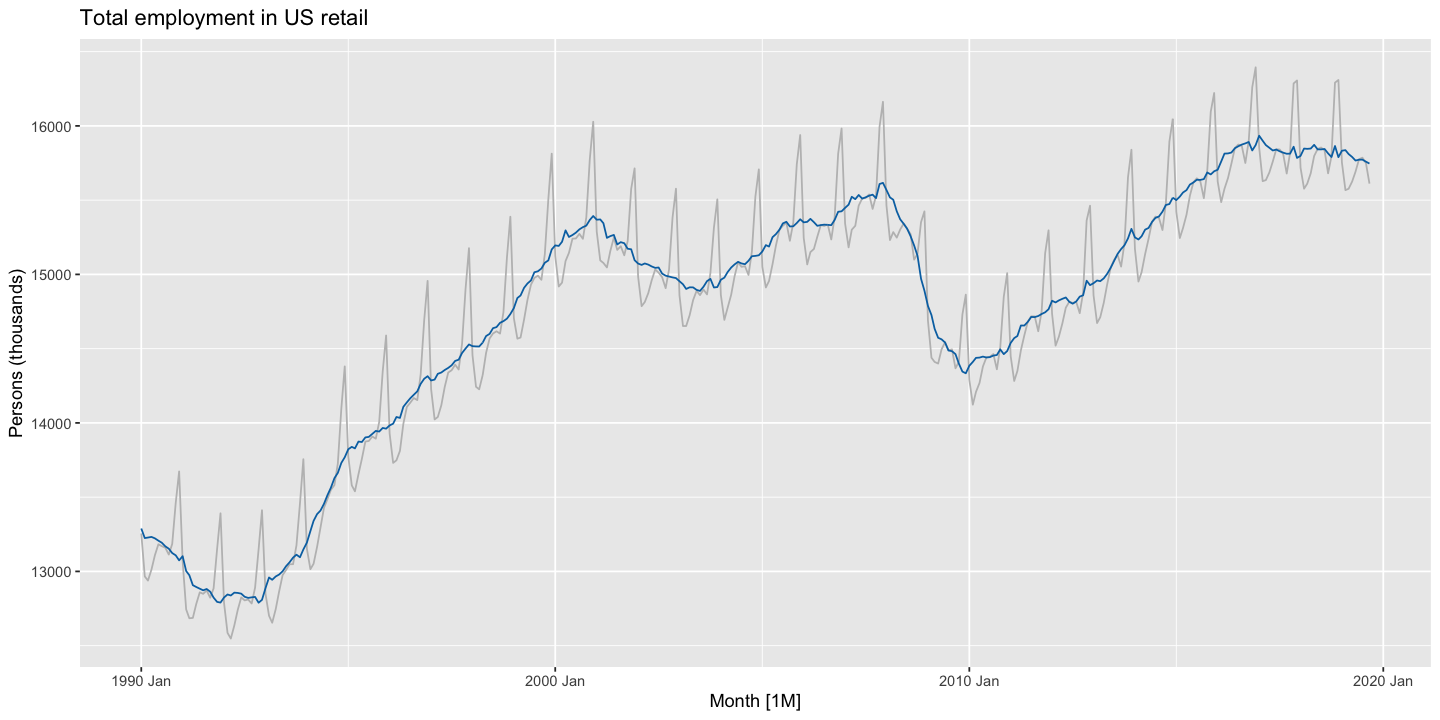

In [13]:
components(dcmp) %>%
  as_tsibble() %>%
  autoplot(Employed, colour="gray") +
  geom_line(aes(y=season_adjust), colour="#0072B2") +
  labs(y="Persons (thousands)",
       title="Total employment in US retail")

## Moving Averages

### Moving Average Smoothing

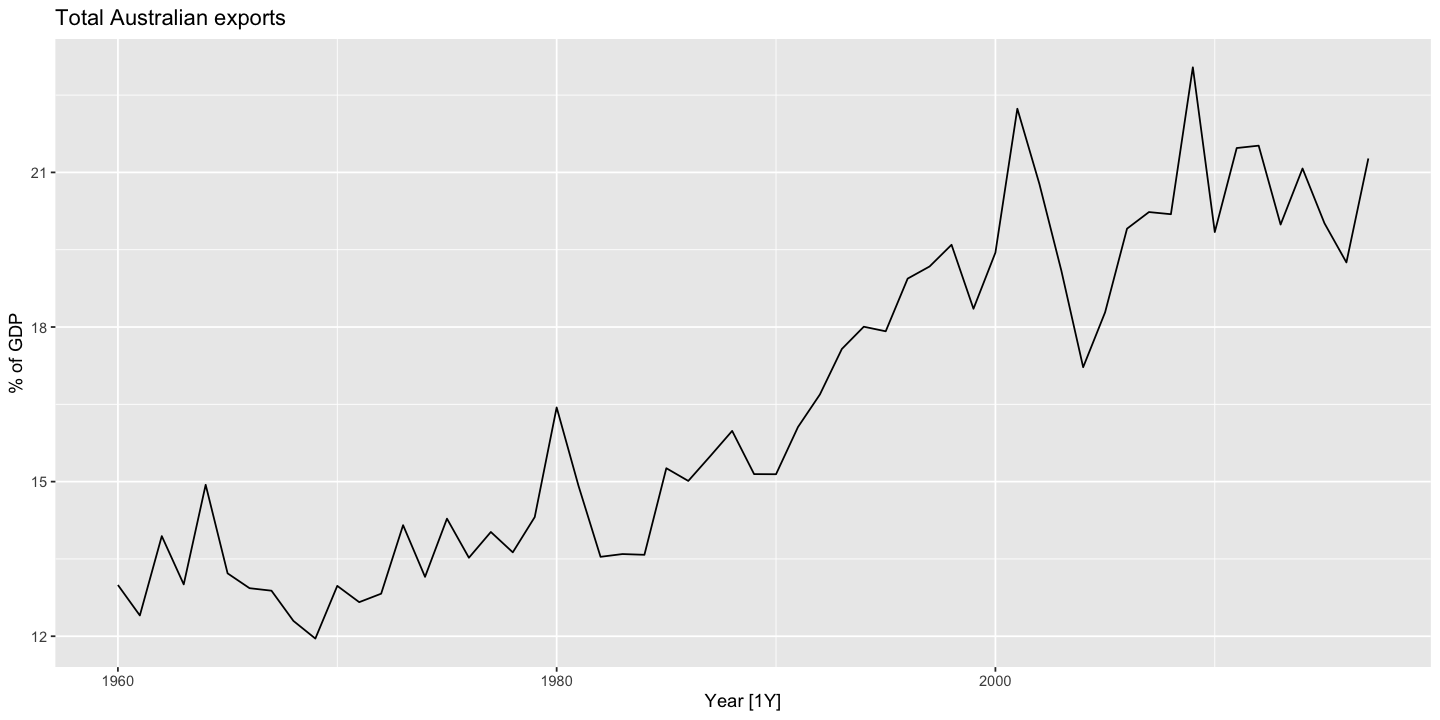

In [14]:
global_economy %>%
  filter(Country=="Australia") %>%
  autoplot(Exports) +
  labs(y="% of GDP", title="Total Australian exports")

In [26]:
aus_exports <- global_economy %>%
  filter(Country=="Australia") %>%
  mutate("5-MA"=slider::slide_dbl(Exports, mean,
                                  .before=2, .after=2, .complete=TRUE)
  )

Warning message:
“Removed 4 row(s) containing missing values (geom_path).”


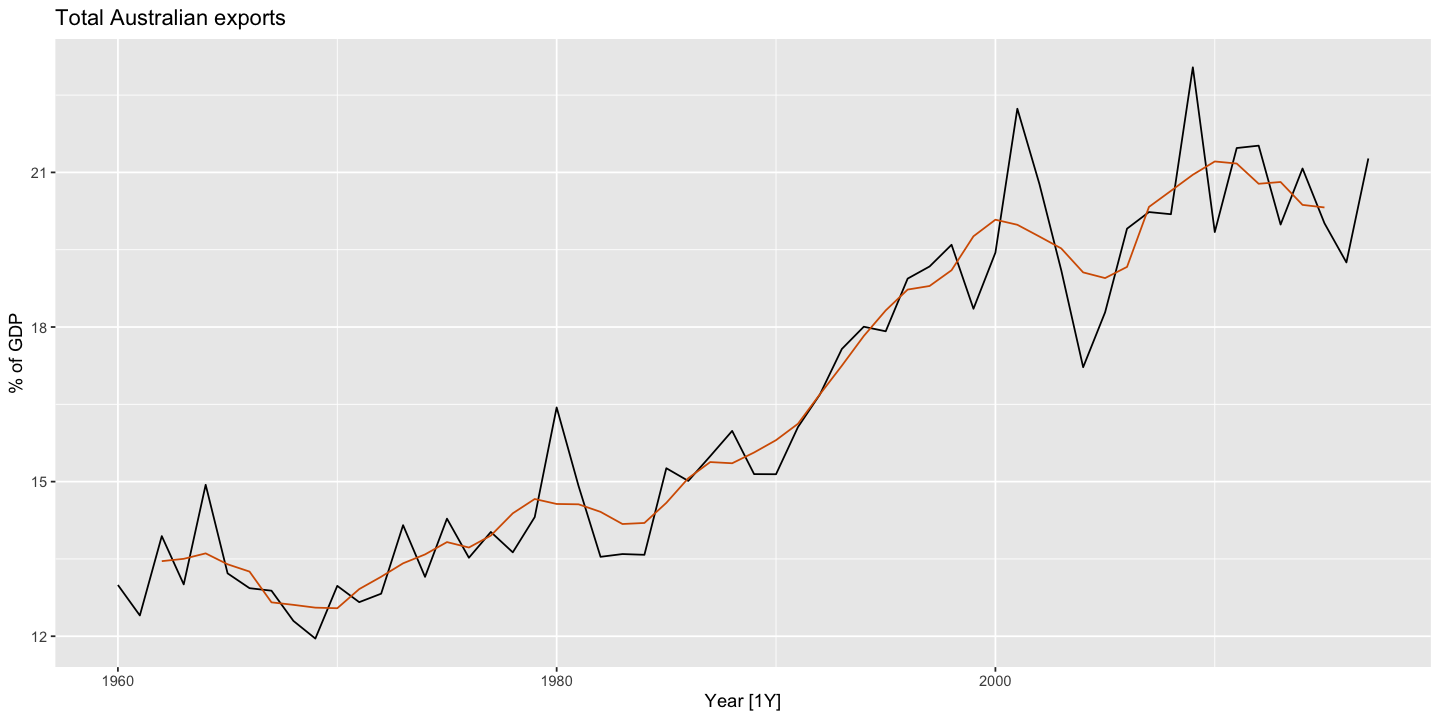

In [27]:
aus_exports %>%
  autoplot(Exports) +
  geom_line(aes(y=`5-MA`), colour="#D55E00") +
  labs(y="% of GDP",
       title="Total Australian exports") +
  guides(colour=guide_legend(title="series"))

### Moving Averages of Moving Averages

In [35]:
beer <- aus_production %>%
  filter(year(Quarter)>=1992) %>%
  select(Quarter, Beer)
beer_ma <- beer %>%
  mutate(
  `4-MA`=slider::slide_dbl(Beer, mean,
                           .before=1, .after=2, .complete=TRUE),
  `2x4-MA`=slider::slide_dbl(`4-MA`, mean,
                             .before=1, .after=0, .complete=TRUE)
  )

### Estimating the Trend-Cycle with Seasonal Data

Warning message:
“Removed 12 row(s) containing missing values (geom_path).”


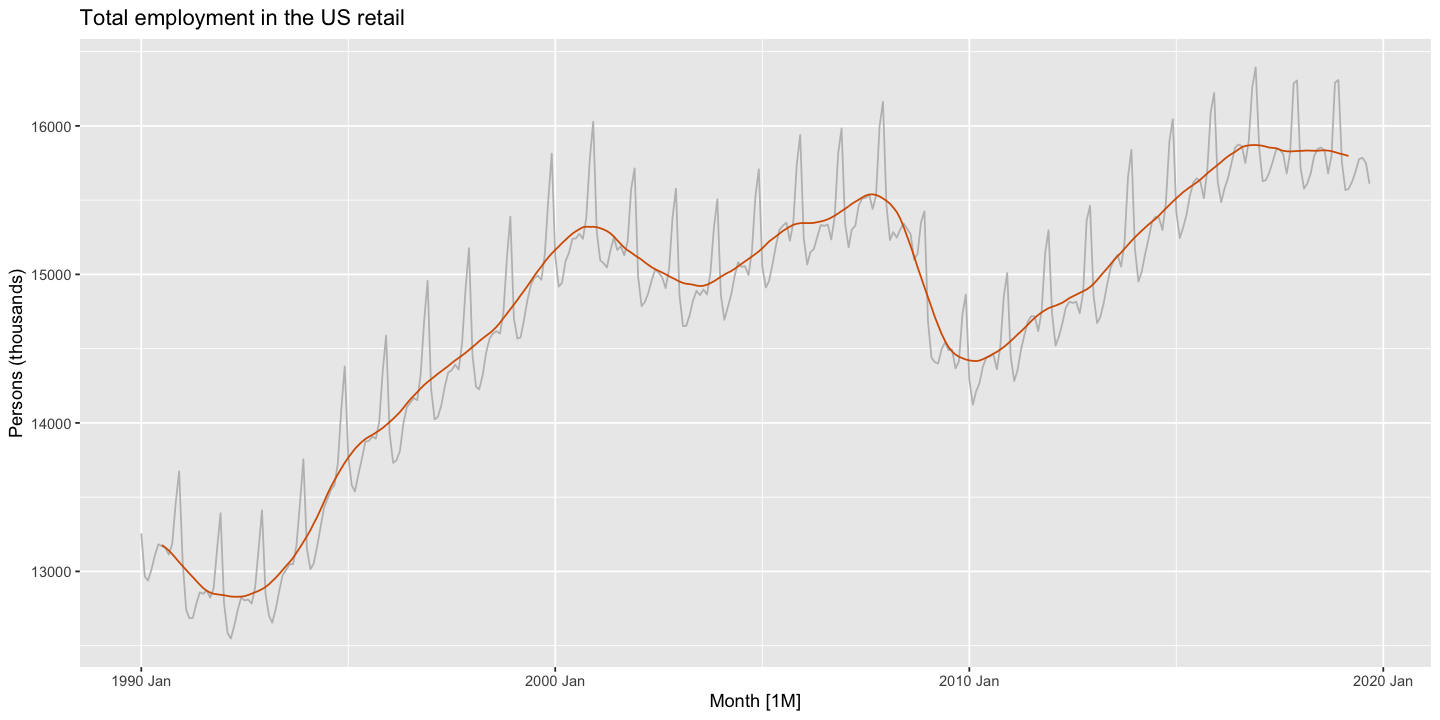

In [39]:
us_retail_employment_ma <- us_retail_employment %>%
  mutate(
      `12-MA`=slider::slide_dbl(Employed, mean,
                                .before=5, .after=6, .complete=TRUE),
      `2x12-MA`=slider::slide_dbl(`12-MA`, mean,
                                  .before=1, .after=0, .complete=TRUE)
  )
us_retail_employment_ma %>%
  autoplot(Employed, colour="gray") +
  geom_line(aes(y=`2x12-MA`), colour="#D55E00") +
  labs(y="Persons (thousands)",
       title="Total employment in the US retail")

## Classical Decomposition

### Additive Decomposition

Warning message:
“Removed 6 row(s) containing missing values (geom_path).”


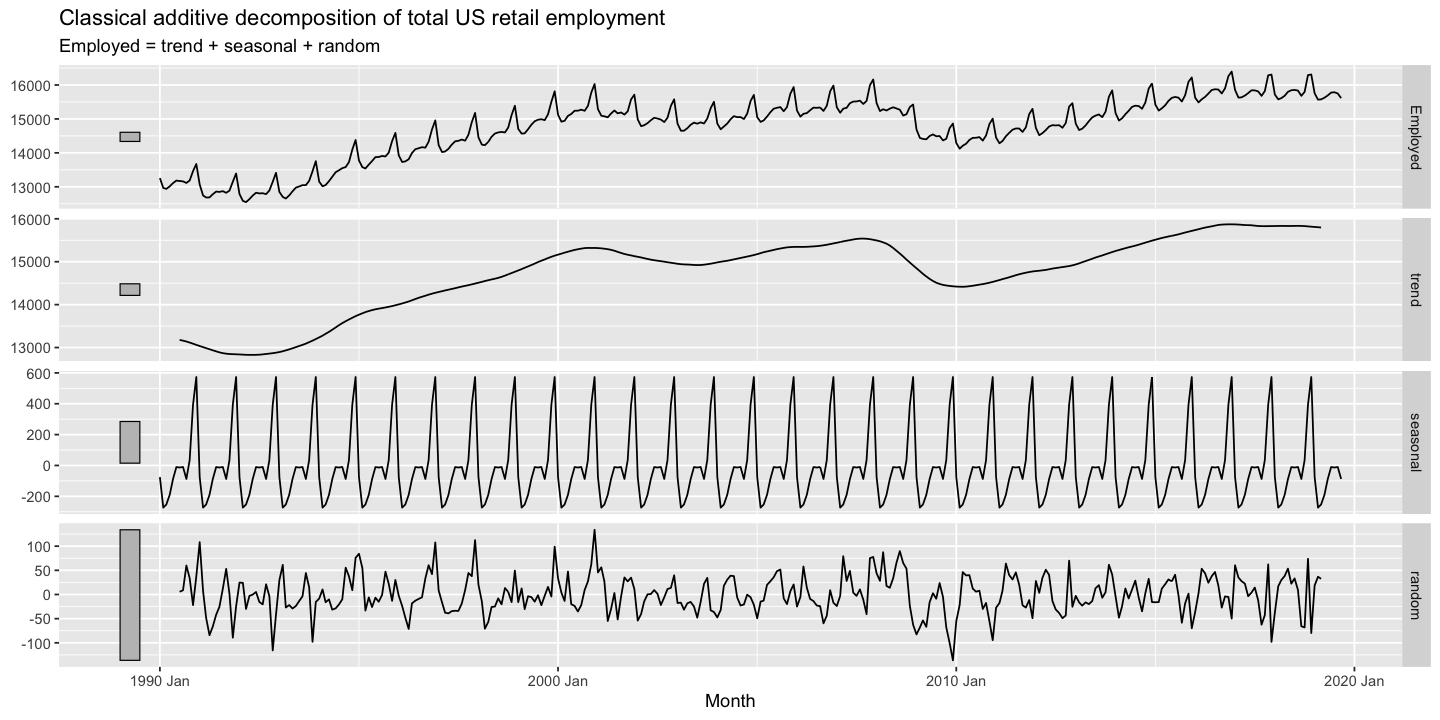

In [40]:
us_retail_employment %>%
  model(
    classical_decomposition(Employed, type="additive")
  ) %>%
  components() %>%
  autoplot() +
  labs(title="Classical additive decomposition of total US retail employment")

## Methods Used by Official Statistics Agencies

### X-11 Method

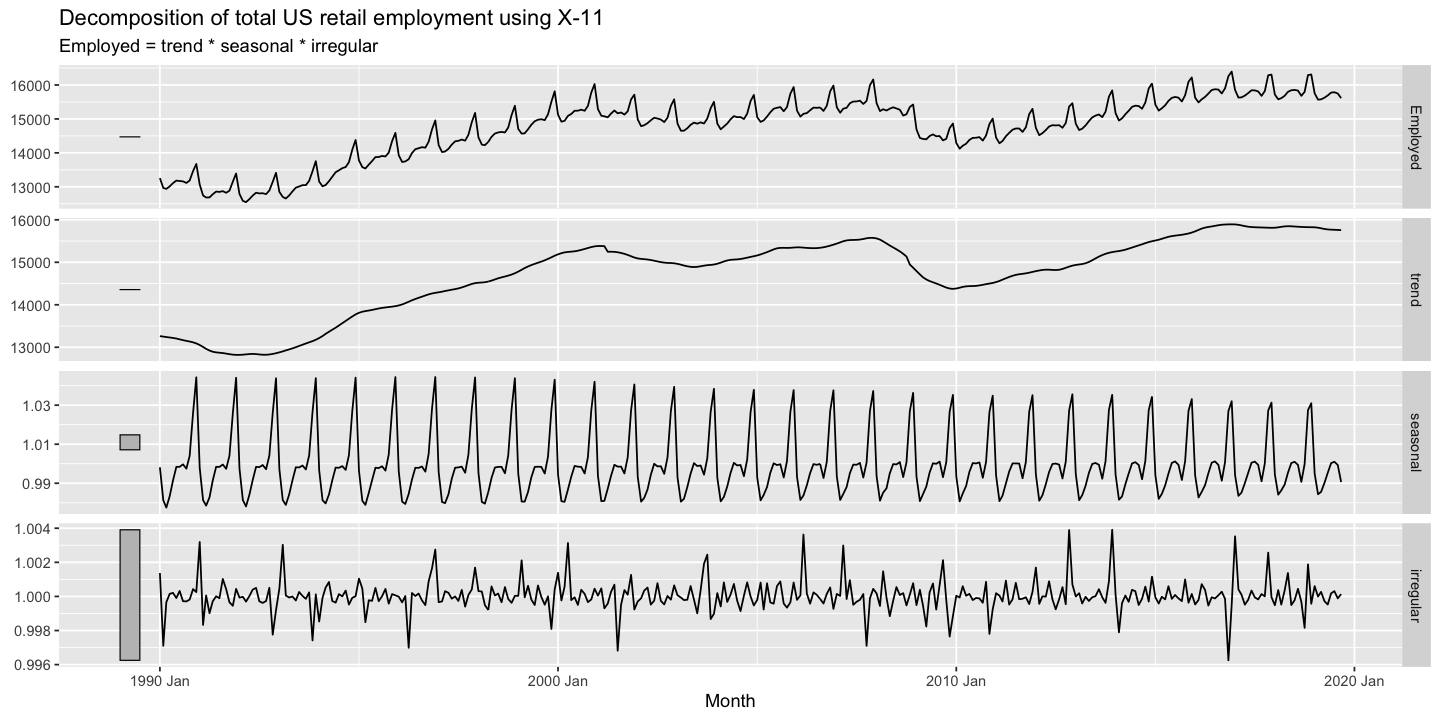

In [41]:
x11_dcmp <- us_retail_employment %>%
  model(x11=X_13ARIMA_SEATS(Employed~x11())) %>%
  components()
autoplot(x11_dcmp) +
  labs(title="Decomposition of total US retail employment using X-11")

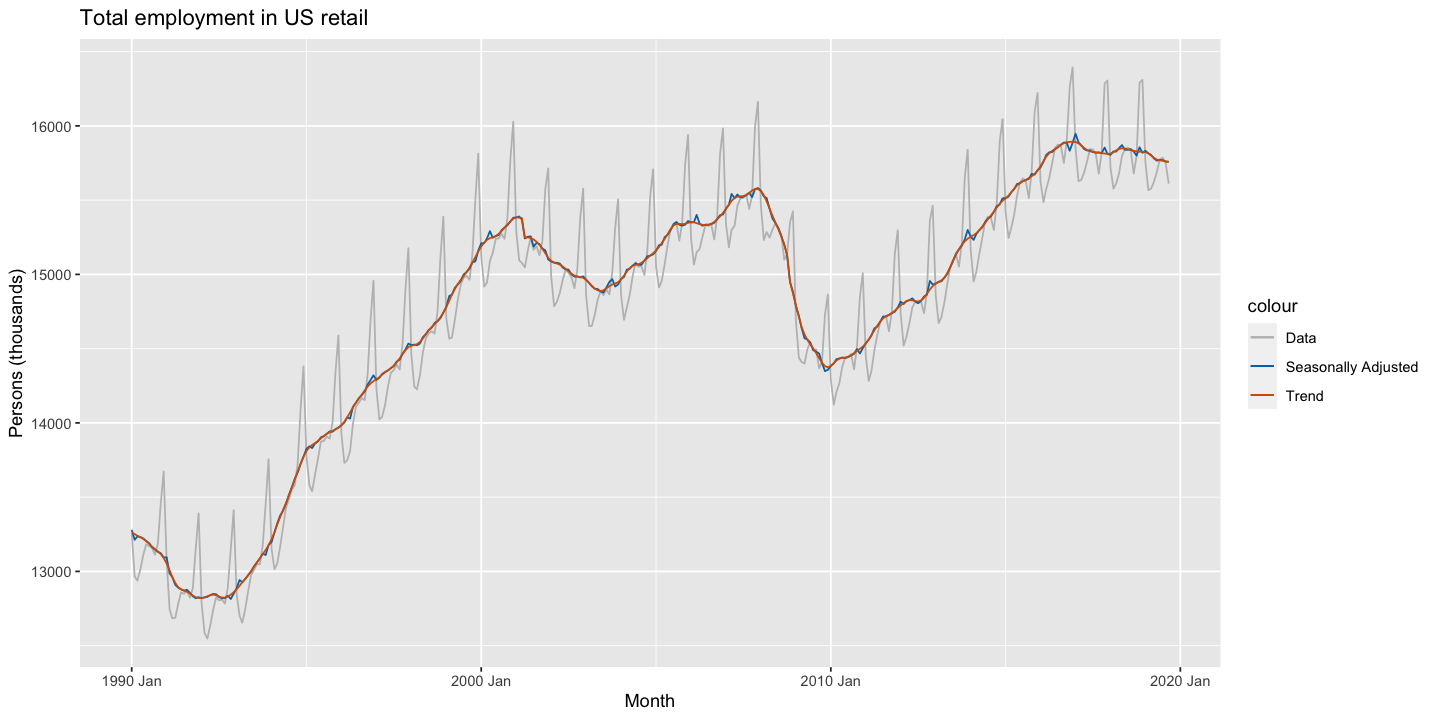

In [42]:
x11_dcmp %>%
  ggplot(aes(x=Month)) +
  geom_line(aes(y=Employed, colour="Data")) +
  geom_line(aes(y=season_adjust, colour="Seasonally Adjusted")) +
  geom_line(aes(y=trend, colour="Trend")) +
  labs(y="Persons (thousands)", title="Total employment in US retail") +
  scale_colour_manual(
    values=c("gray", "#0072B2", "#D55E00"),
    breaks=c("Data", "Seasonally Adjusted", "Trend")
  )

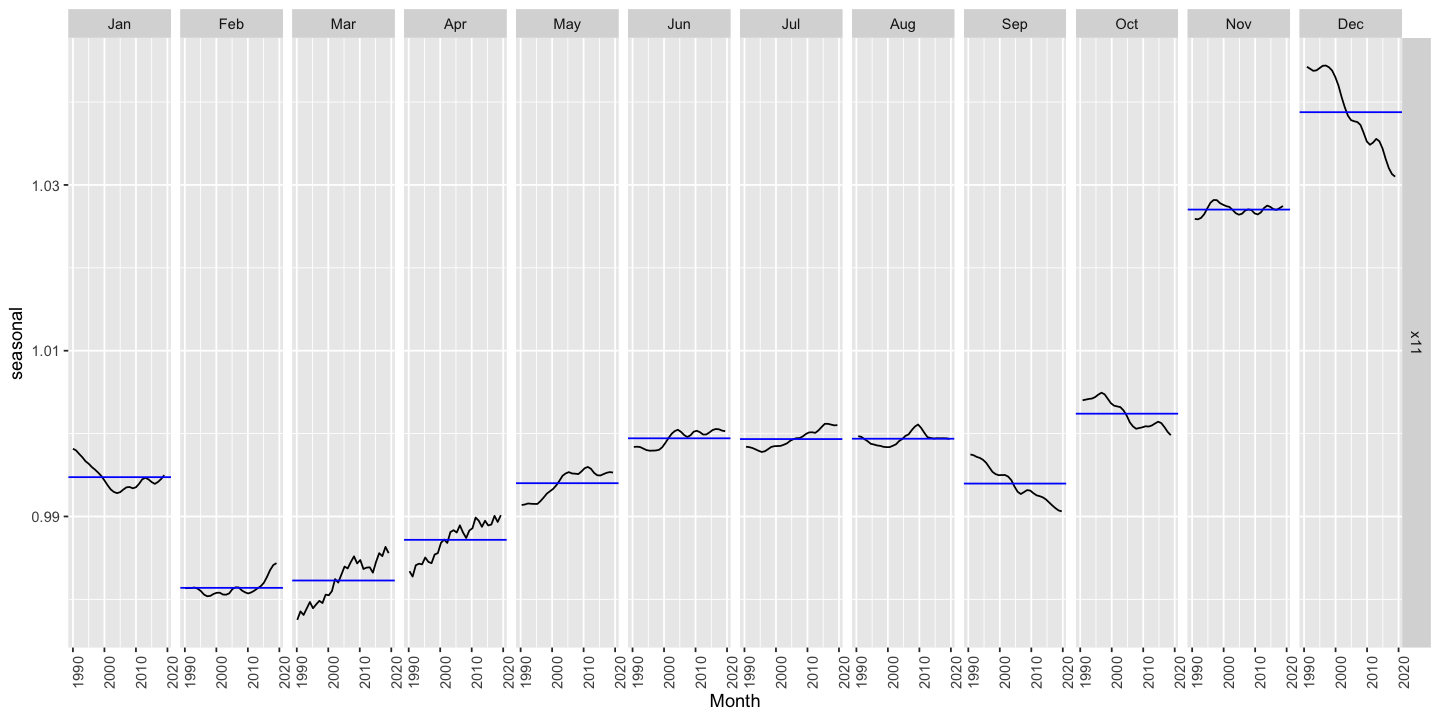

In [43]:
x11_dcmp %>%
  gg_subseries(seasonal)

### SEATS Method

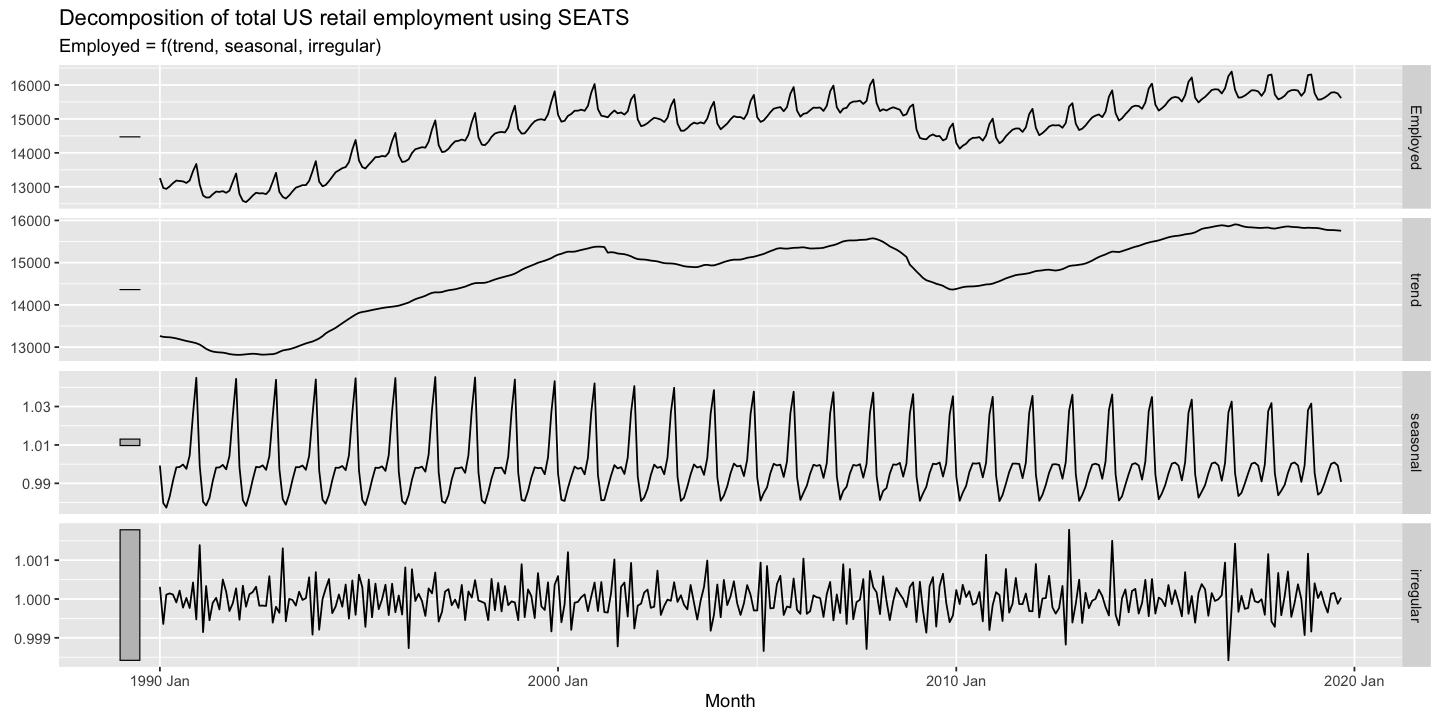

In [44]:
seats_dcmp <- us_retail_employment %>%
  model(seats=X_13ARIMA_SEATS(Employed~seats())) %>%
  components()
autoplot(seats_dcmp) +
  labs(title="Decomposition of total US retail employment using SEATS")

## STL

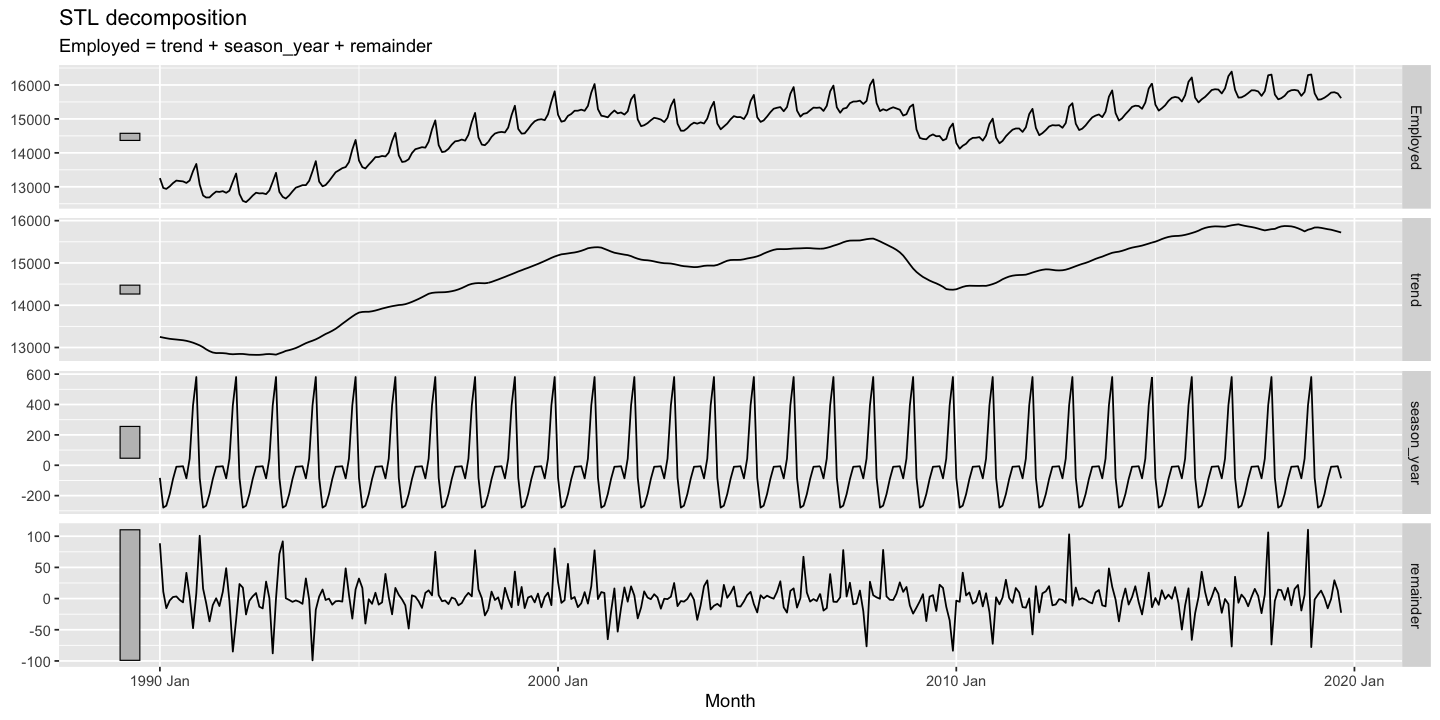

In [45]:
us_retail_employment %>%
  model(
    STL(Employed~trend(window=7) +
                 season(window="periodic"),
    robust=TRUE)) %>%
  components() %>%
  autoplot()

## Exercices